In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matches: pd.DataFrame = pd.read_csv('matches.csv')
matches = matches.drop(matches.columns[0], axis = 1)

Elos = pd.read_csv('clubelo-club-rankings.csv')
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity
1,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity
2,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity
3,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,ManchesterCity
4,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2024-04-24,20:00,Premier League,Matchweek 29,Wed,Away,L,2,4,Manchester Utd,...,Match Report,NaN,10.0,4.0,17.8,1.0,0,0,2024,SheffieldUnited
756,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Away,L,1,5,Newcastle Utd,...,Match Report,NaN,15.0,4.0,13.5,0.0,0,0,2024,SheffieldUnited
757,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,...,Match Report,NaN,16.0,4.0,18.0,0.0,1,1,2024,SheffieldUnited
758,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,...,Match Report,NaN,13.0,1.0,21.0,0.0,0,0,2024,SheffieldUnited


In [3]:
Elos[Elos['Club'] == 'Luton']

,Rank,Club,Country,Level,Elo,From,To,date,updated_at
110,NaN,Luton,ENG,2,1588.765991,2023-03-19,2023-04-01,2023-04-16,2023-04-16 18:17:58
753,NaN,Luton,ENG,2,1588.765991,2023-03-19,2023-04-01,2023-04-16,2023-04-16 18:18:11
1396,NaN,Luton,ENG,2,1588.765991,2023-03-19,2023-04-01,2023-03-27,2023-04-16 18:31:45
2039,NaN,Luton,ENG,2,1588.765991,2023-03-19,2023-04-01,2023-03-28,2023-04-16 18:31:46
2682,NaN,Luton,ENG,2,1588.765991,2023-03-19,2023-04-01,2023-03-29,2023-04-16 18:31:48
...,...,...,...,...,...,...,...,...,...
356728,NaN,Luton,ENG,2,1497.860229,2024-12-15,2024-12-20,2024-12-19,2024-12-19 10:18:33
357383,NaN,Luton,ENG,2,1473.744263,2025-01-07,2025-01-18,2025-01-10,2025-01-10 03:56:58
358012,NaN,Luton,ENG,2,1473.744263,2025-01-07,2025-01-18,2025-01-10,2025-01-10 10:17:33
358641,NaN,Luton,ENG,2,1473.744263,2025-01-07,2025-01-18,2025-01-11,2025-01-11 10:15:33


In [4]:
columns = [
    'Venue',
    'xG',
    'Opponent',
    'Opponent Elo',
    'Team',
    'Team Elo',
    'GF'
]
translations = {
    'ManchesterCity': 'Man City',
    'TottenhamHotspur': 'Tottenham',
    'NewcastleUnited': 'Newcastle',
    'ManchesterUnited': 'Man United',
    'WestHamUnited': 'West Ham',
    'BrightonandHoveAlbion': 'Brighton',
    'WolverhamptonWanderers': 'Wolves',
    'NottinghamForest': 'Forest',
    'LutonTown': 'Luton',

}

opponent_translation = {
    'NewcastleUnited': 'Newcastle Utd',
    'SheffieldUnited': 'Sheffield Utd',
    'BrightonandHoveAlbion': 'Brighton',
    'WestHamUnited': 'West Ham',
    'AstonVilla': 'Aston Villa',
    'LutonTown': 'Luton Town',
    'CrystalPalace': 'Crystal Palace',
    'ManchesterUnited': 'Manchester Utd',
    'NottinghamForest': "Nott'ham Forest",
    'ManchesterCity': 'Manchester City',
    'TottenhamHotspur': 'Tottenham',
    'WolverhamptonWanderers': 'Wolves',
}
def add_space(team):
    if ' ' not in team:
        name = ''
        for a, i in enumerate(team):
            if i in ascii_uppercase and a != 0:
                name += ' ' + i 
            else:
                name += i
    return name

def get_name(translations, team):
    if team in translations:
        team = translations[team]
    else:
        team = add_space(team)
    return team



matches1: pd.DataFrame = pd.DataFrame(matches, columns=columns)
team_names = matches['Team'].unique()
from string import ascii_uppercase

def get_elo(team):
    elo = Elos[Elos['Club'] == team].Elo.values[200]
    return elo    
for team_ in team_names:
    team = get_name(translations, team_)

    opponent = get_name(opponent_translation, team_)
    this_elo = get_elo(team) 
    print(opponent, this_elo)
    matches1.loc[matches1['Team'] == team_, 'Team Elo'] = this_elo
    matches1.loc[matches1['Opponent'] == opponent, 'Opponent Elo'] = this_elo

matches1['Elo diff'] = matches1['Team Elo'] - matches1['Opponent Elo']

Manchester City 2070.24682617
Arsenal 1947.93322754
Liverpool 1953.74914551
Aston Villa 1860.88110352
Tottenham 1830.76745605
Chelsea 1789.70471191
Newcastle Utd 1872.48046875
Manchester Utd 1825.61425781
West Ham 1782.46337891
Crystal Palace 1733.76818848
Brighton 1828.14819336
Bournemouth 1663.03674316
Fulham 1722.0769043
Wolves 1713.86755371
Everton 1699.03662109
Brentford 1801.06494141
Nott'ham Forest 1682.09448242
Luton Town 1603.01074219
Burnley 1646.4309082
Sheffield Utd 1598.96118164


In [5]:
def get_team_results(team: str):
    

    df = matches1[matches1['Team'] == team]
    df = df.drop(columns=['Team Elo', 'Opponent Elo'])
    print(df)

    return df

team_results = {k: get_team_results(k) for k in team_names}

for team, df in team_results.items():
    df['Game'] = np.arange(1, len(df) + 1)
    df['Venue'] = np.where(df['Venue'] == 'Home', 1, 0)


    

   Venue   xG         Opponent            Team  GF    Elo diff
0   Away  1.9          Burnley  ManchesterCity   3  423.815918
1   Home  1.0    Newcastle Utd  ManchesterCity   1  197.766357
2   Away  3.5    Sheffield Utd  ManchesterCity   2  471.285645
3   Home  2.2           Fulham  ManchesterCity   5  348.169922
4   Away  3.6         West Ham  ManchesterCity   3  287.783447
5   Home  1.3  Nott'ham Forest  ManchesterCity   2  388.152344
6   Away  0.9           Wolves  ManchesterCity   1  356.379272
7   Away  0.5          Arsenal  ManchesterCity   0  122.313599
8   Home  0.8         Brighton  ManchesterCity   2  242.098633
9   Away  4.0   Manchester Utd  ManchesterCity   3  244.632568
10  Home  1.9      Bournemouth  ManchesterCity   6  407.210083
11  Away  2.9          Chelsea  ManchesterCity   4  280.542114
12  Home  1.3        Liverpool  ManchesterCity   1  116.497681
13  Home  2.6        Tottenham  ManchesterCity   3  239.479370
14  Away  0.6      Aston Villa  ManchesterCity   0  209

In [6]:
from sklearn.linear_model import LinearRegression
from scipy.stats import poisson

In [7]:
class OrdinaryLr:
    def __init__(self, df, matches=37):
        self.train_df = df[:matches]
        self.train_df['Game'] = np.arange(1, len(self.train_df) + 1)
        
    def fit(self):
        self.train_X = pd.DataFrame(self.train_df, columns=['Game', 'Elo diff', 'Venue'])
        self.train_y = self.train_df['xG']
        self.lr = LinearRegression().fit(self.train_X.values, self.train_y)
        return self.lr
    
    def predict(self, *args):
        return self.lr.predict(args)

class Quadratic_time_weight:
    def __init__(self, df, matches=37):
        self.train_df = df[:matches]
        self.train_df['Game'] = np.arange(1, len(self.train_df) + 1) ** 2
    
    def fit(self):
        self.train_X = pd.DataFrame(self.train_df, columns=['Game', 'Elo diff', 'Venue'])
        self.train_y = self.train_df['xG']
        self.lr = LinearRegression().fit(self.train_X.values, self.train_y)
        return self.lr
    
    def predict(self, *args):
        args[0] = args[0] ** 2
        return self.lr.predict(args)

class Exponential_time_weight:
    def __init__(self, df, matches=37, exp=10):
        self.train_df = df[:matches]
        self.train_df['Game'] = exp ** np.arange(1, len(self.train_df) + 1)
    
    def fit(self):
        self.train_X = pd.DataFrame(self.train_df, columns=['Game', 'Elo diff', 'Venue'])
        self.train_y = self.train_df['xG']
        self.lr = LinearRegression().fit(self.train_X.values, self.train_y)
        return self.lr
    
    def predict(self, *args):
        args[0] = 10 ** args[0]
        return self.lr.predict(args)

class ExpectedVariate:
    def __init__(self, df, matches=37, exp=10):
        self.train_df = df[:matches]
        self.train_df['Game'] = exp ** np.arange(1, len(self.train_df) + 1)
        self.train_df.loc['XgVar', :] = self.train_df['GF'] - self.train_df['xG']
    
    def fit(self):
        xg_train_x = self.train_df['Game']
        xg_train_y = self.train_df['xG'] 
        self.train_x = pd.DataFrame(self.train_df, columns=['Game', 'Elo diff', 'Venue'])
        self.train_y = self.train_df['xG']
# models = {team: train_model(df) for team, df in team_results.items()}


In [8]:
from random import randint, choice
from collections import Counter
def get_score(xg):
    mu = 2
    r = poisson.rvs(mu, size=1000)
    r = choice(r)
    return r

In [9]:
def evaluate_model(model_class, game, X, **kwargs):
    mean_deviation = 0
    true_deviation = 0
    for name in team_names:
        df = team_results[name]
        model = model_class(df, game-1, **kwargs).fit()
        
        test_X = df.loc[df['Game'] == game, X]
        xg = model.predict(test_X)
        test_Y = df.loc[df['Game'] == game, 'GF'].values[0]
        xg_Y = df.loc[df['Game'] == game, 'xG'].values[0]
        mean_deviation += abs(((xg - test_Y) / xg))
        true_deviation += abs((xg_Y - test_Y) / xg_Y)
    mean_deviation = (mean_deviation / len(team_names))
    true_deviation = (true_deviation / len(team_names))
    error_rate = (mean_deviation - true_deviation) / true_deviation
    return error_rate

best_accuracy = 0
best_i = 0
for i in range(2, 100):
    error_rate = evaluate_model(Exponential_time_weight, 38, ['Game', 'Elo diff', 'Venue'], exp=i)
    accuracy = 1-error_rate
    if accuracy > best_accuracy:
        best_accuracy = accuracy 
        best_i = i
# this is how much on average our model is wrong by(0.9 goals, which is actually not so bad)

C:\Users\jackt\AppData\Local\Temp\ipykernel_16688\3520349228.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train_df['Game'] = exp ** np.arange(1, len(self.train_df) + 1)
c:\Users\jackt\anaconda3\envs\islp_20241005\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\jackt\AppData\Local\Temp\ipykernel_16688\3520349228.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train_df['Game'] = exp 

In [10]:
best_accuracy, best_i

(array([0.98098815]), 74)

In [11]:
def assign_models(model_class, **kwargs):
    models = {}
    for team in team_names:
        df = team_results[team]
        model = model_class(df, matches=37).fit()
        models[team] = model
    
    return models

models = assign_models(Exponential_time_weight, exp=74)

C:\Users\jackt\AppData\Local\Temp\ipykernel_16688\3520349228.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train_df['Game'] = exp ** np.arange(1, len(self.train_df) + 1)
C:\Users\jackt\AppData\Local\Temp\ipykernel_16688\3520349228.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train_df['Game'] = exp ** np.arange(1, len(self.train_df) + 1)
C:\Users\jackt\AppData\Local\Temp\ipykernel_16688\3520349228.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [12]:
def generate_score(home, away, game):
    model_home = models[home]
    model_away = models[away]
    home_xg = model_home.predict([[game, get_elo(get_name(translations, home)) - get_elo(get_name(translations, away)), 1]])
    away_xg = model_away.predict([[game, get_elo(get_name(translations, away)) - get_elo(get_name(translations, home)), 0]])
    home_score = get_score(home_xg)
    away_score = get_score(away_xg)
    return home_score, away_score, home_xg, away_xg


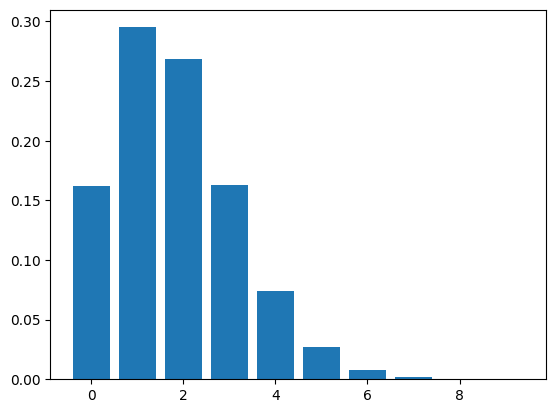

In [13]:
def plot_xg_dist(mu):
    ax= plt.subplot()
    x = np.arange(0, 10)
    y = poisson.pmf(x, mu)
    ax = plt.bar(x=x, height=y)

plot_xg_dist(generate_score('Brentford', 'Everton', 38)[2])

In [14]:
def add_score_to_training_set(team, opponent, home_score, away_score, home_xg, away_xg, game):
    team_results[team] = pd.concat([team_results[team], pd.DataFrame({'Venue': [1], 'xG': [home_xg], 'Opponent': [opponent], 'Team': [team], 'GF': [home_score], 'Elo diff': [get_elo(get_name(translations, team)) - get_elo(get_name(translations, opponent))], 'Game': [game]})])
    team_results[opponent] = pd.concat([team_results[opponent], pd.DataFrame({'Venue': [0], 'xG': [away_xg], 'Opponent': [team], 'Team': [opponent], 'GF': [away_score], 'Elo diff': [get_elo(get_name(translations, opponent)) - get_elo(get_name(translations, team))], 'Game': [game]})])

